In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head(n = 10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [4]:
print("A base de dados apresenta {} registros e {} variáveis. ".format(dados.shape[0], dados.shape[1]))

A base de dados apresenta 32960 registros e 9 variáveis. 


In [5]:
tipos_de_imovel = dados['Tipo']
tipos_de_imovel.drop_duplicates(inplace = True)
tipos_de_imovel.index = range(tipos_de_imovel.shape[0])
tipos_de_imovel

0                       Quitinete
1                            Casa
2         Conjunto Comercial/Sala
3                     Apartamento
4              Casa de Condomínio
5                  Prédio Inteiro
6                            Flat
7                      Loja/Salão
8         Galpão/Depósito/Armazém
9                  Casa Comercial
10                   Casa de Vila
11                 Terreno Padrão
12                    Box/Garagem
13                           Loft
14    Loja Shopping/ Ct Comercial
15                        Chácara
16          Loteamento/Condomínio
17                          Sítio
18                  Pousada/Chalé
19                         Studio
20                          Hotel
21                      Indústria
Name: Tipo, dtype: object

In [6]:
residencial = ['Quitinete', 
                'Casa',
                'Apartamento',
                'Casa de Condomínio',
                'Casa de Vila']

In [7]:
selecao = dados['Tipo'].isin(residencial)
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [8]:
dados_residencial = dados[selecao]
dados_residencial.shape[0]

22580

In [9]:
dados_residencial.index = range(dados_residencial.shape[0])
dados_residencial.head(n = 10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [10]:
dados_residencial.to_csv('aluguel_residencial.csv', sep = ';', index = False )

In [11]:
dados = pd.read_csv("aluguel_residencial.csv", sep = ";")
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


## Seleção

In [12]:
#Selecione somente os imóveis classificados com tipo 'Apartamento'.
#Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
#Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
#Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.

In [13]:
#Selecione somente os imóveis classificados com tipo 'Apartamento'.
selecao = dados['Tipo'] == 'Apartamento'
s1 = dados[selecao].shape[0]
s1

19532

In [14]:
#Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
selecao = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
s2 = dados[selecao].shape[0]
s2 

2212

In [15]:
#Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
#60 <= Area <=100
selecao = (dados['Area'] >= 60) & (dados['Area'] <= 100)
s3 = dados[selecao].shape[0]
s3

8719

In [16]:
#Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.
selecao = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000)
s4 = dados[selecao].shape[0]
s4

41

In [17]:
print("Nº de imóveis classificados com tipo 'Apartamento' -> {}".format(s1))
print("Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> {}".format(s2))
print("Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> {}".format(s3))
print("Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> {}".format(s4))

Nº de imóveis classificados com tipo 'Apartamento' -> 19532
Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> 2212
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> 8719
Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> 41


## Tratamento de dados

In [18]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [19]:
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [20]:
dados.dropna(subset= ['Valor'], inplace = True)
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [21]:
selecao = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull())
selecao

0        False
1        False
2        False
3        False
4         True
         ...  
22575    False
22576    False
22577    False
22578    False
22579    False
Length: 22571, dtype: bool

In [22]:
dados = dados[~selecao]
dados.fillna(0, inplace = True)
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


## criando variáveis

In [23]:
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']

In [24]:
 dados['Valor m2'] = (dados['Valor']/dados['Area']).round(2)

In [25]:
dados['Valor Bruto m2'] = (dados['Valor Bruto']/dados['Area']).round(2)

In [26]:
 dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36


In [27]:
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

In [28]:
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')
dados.head(n = 10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Casa
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Casa
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Apartamento
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Apartamento
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Apartamento


## excluindo variáveis

In [29]:
dados.drop(['Valor Bruto', 'Valor Bruto m2'], axis = 1, inplace = True)

In [30]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


## agrupamento

In [31]:
grupo_bairro = dados.groupby('Bairro')
grupo_bairro

In [32]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


In [33]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


## Estatísticas descritivas

In [34]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [35]:
plt.rc('figure', figsize = (20,10))

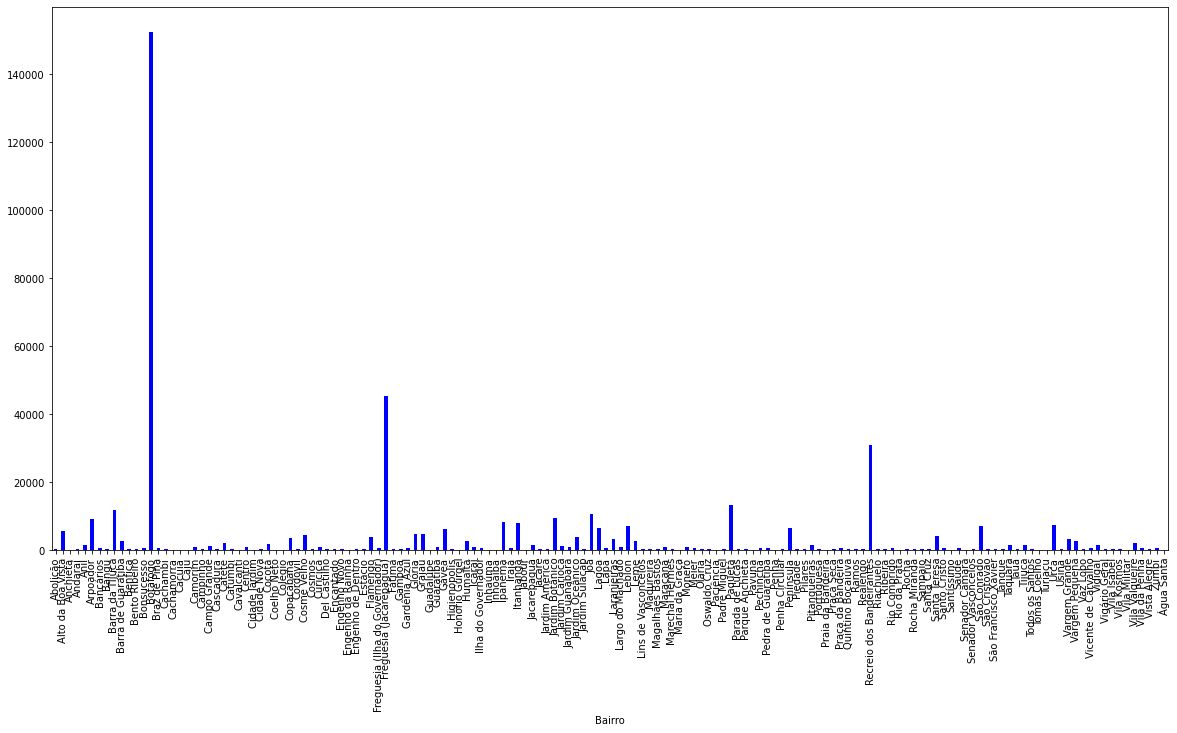

In [36]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

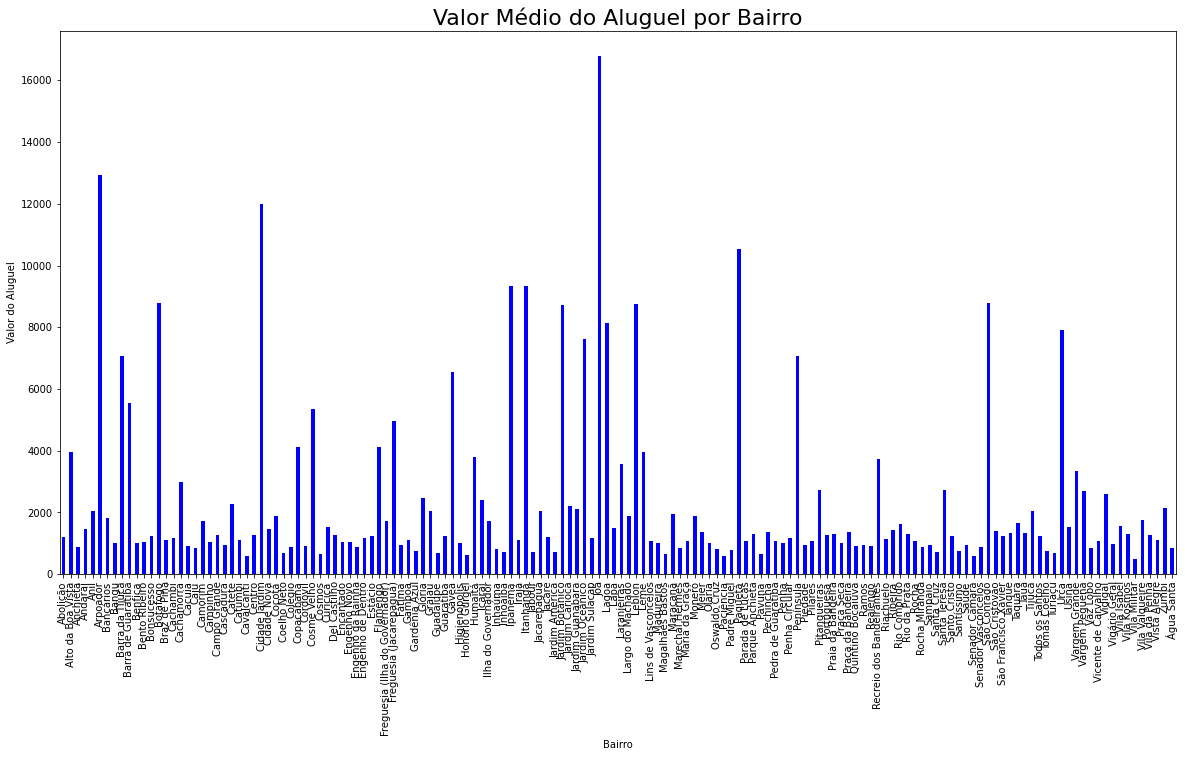

In [37]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

In [38]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


## Identificando e removendo outliers

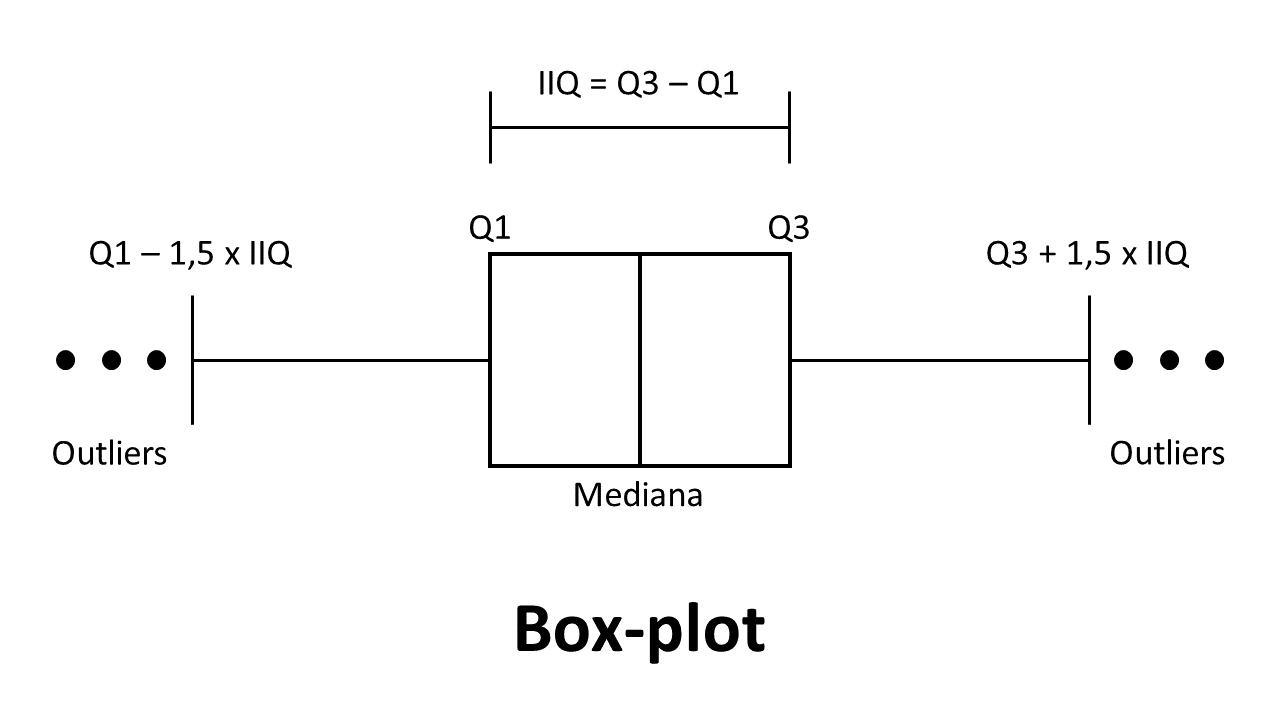

In [39]:
valor = dados['Valor']

In [40]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [41]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
novos_dados = dados[selecao]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39aecded68>]],
      dtype=object)

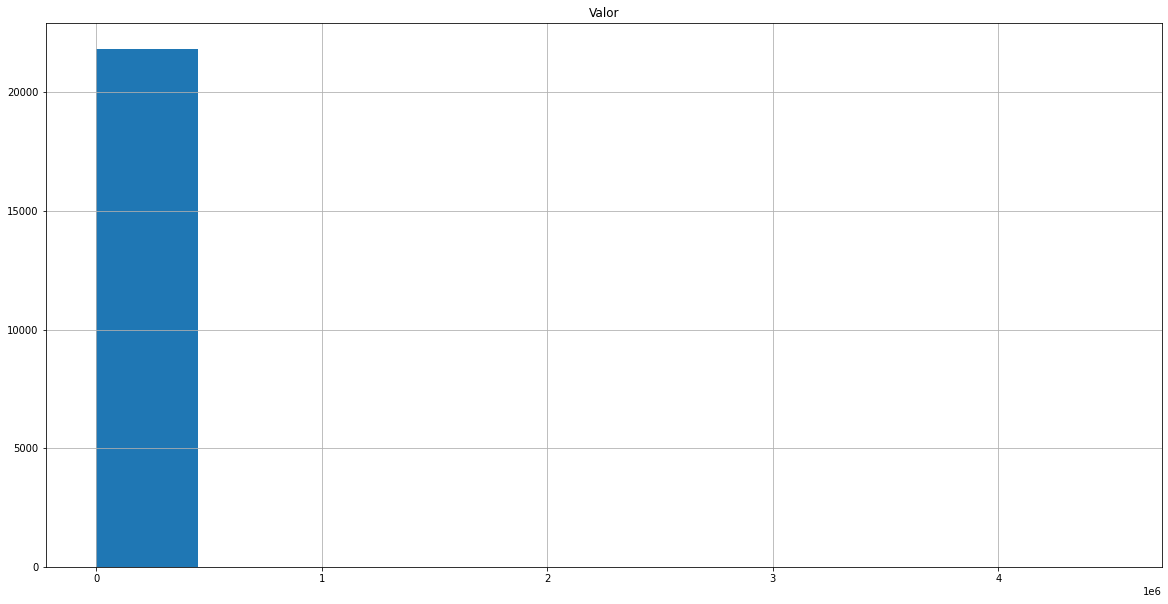

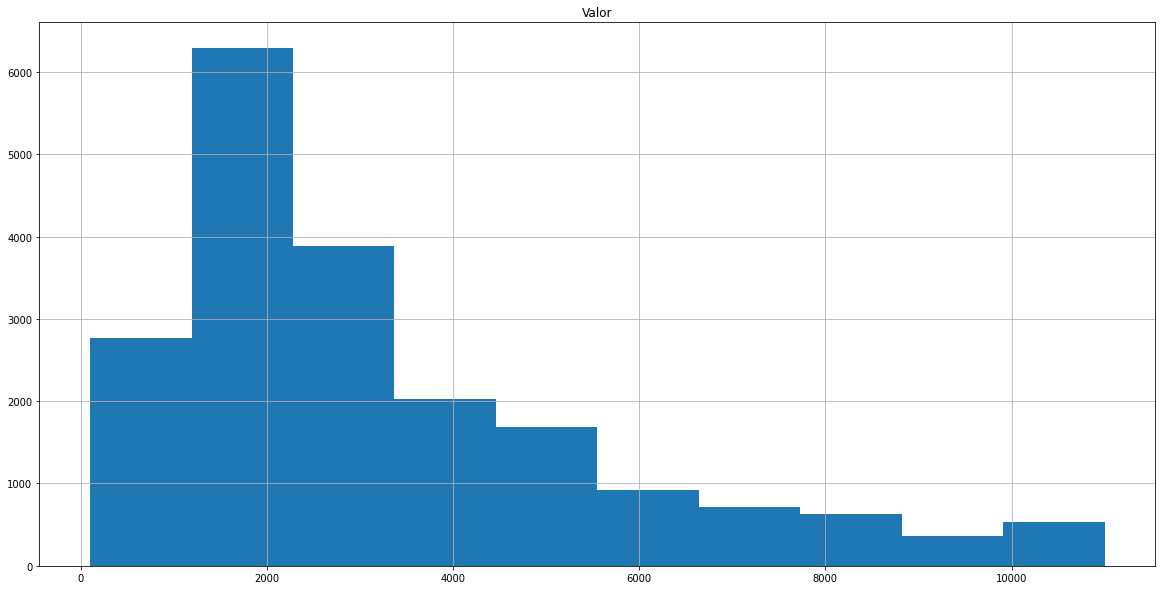

In [42]:
dados.hist(['Valor'])
novos_dados.hist(['Valor'])

## introdução aos gráficos Matplotlib

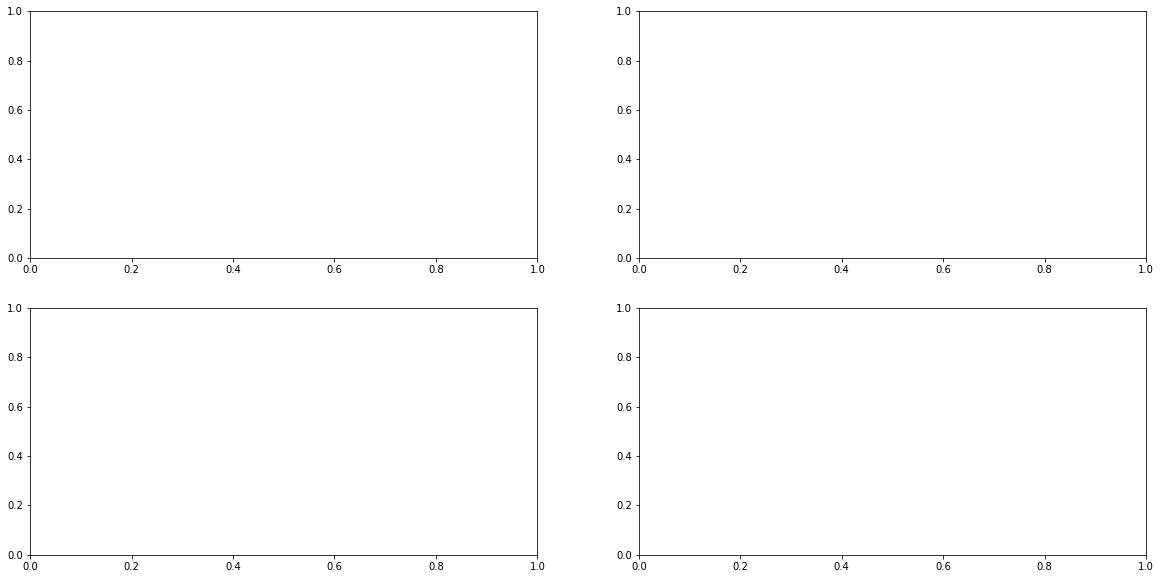

In [44]:
area = plt.figure() 

g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [46]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100) 
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

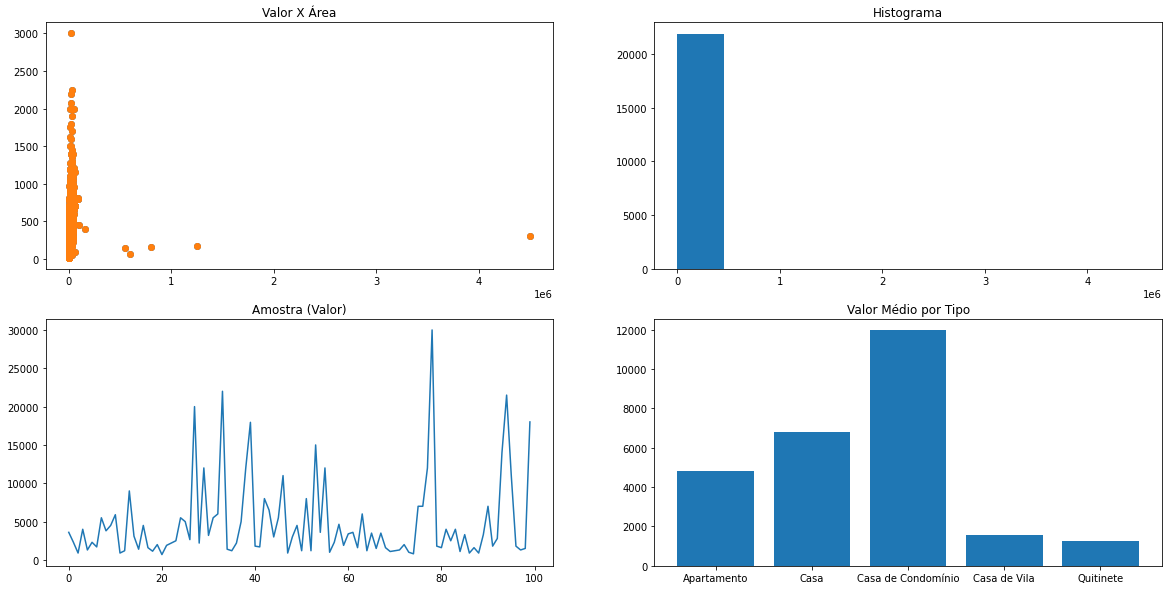

In [48]:
area

In [49]:
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')